<a href="https://colab.research.google.com/github/gayoung-k/object-detection-learning-notes/blob/main/pascal_voc_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Download PASCAL VOC 2012

In [1]:

!mkdir ./data

!wget wget https://github.com/chulminkw/DLCV/releases/download/1.0/VOCtrainval_11-May-2012.tar
!tar -xvf VOCtrainval_11-May-2012.tar -C /content/data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
VOCdevkit/VOC2012/SegmentationClass/2008_001874.png
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC2012/Segmentati

In [2]:
!ls /content/data/VOCdevkit/VOC2012
!ls /content/data/VOCdevkit/VOC2012/JPEGImages | head -n 5

Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject
2007_000027.jpg
2007_000032.jpg
2007_000033.jpg
2007_000039.jpg
2007_000042.jpg


#### Viewing a Random Image from the JPEGImages Directory


img shape: (281, 500, 3)


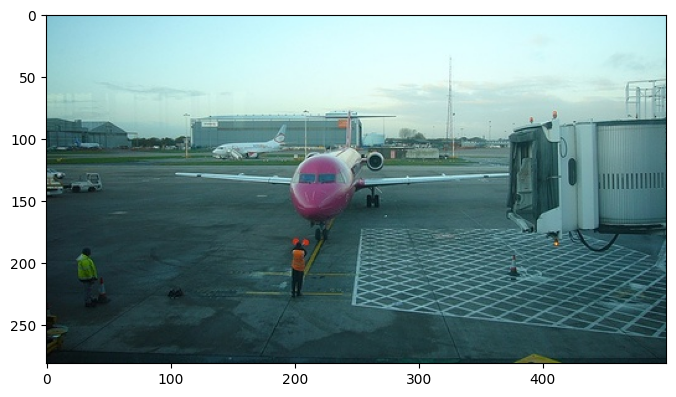

In [4]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

# In the Colab version, relative paths are not used.
# Use absolute paths based on the /content directory.
# default_dir is set to /content/data, and detailed files/directories are specified with os.path.join().
default_dir = '/content/data'
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()


#### Viewing a Random Annotation File from the Annotations Directory


In [5]:
!cat /content/data/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

#### Viewing a Random Masking Image from the SegmentationObject Directory


img shape: (281, 500, 3)


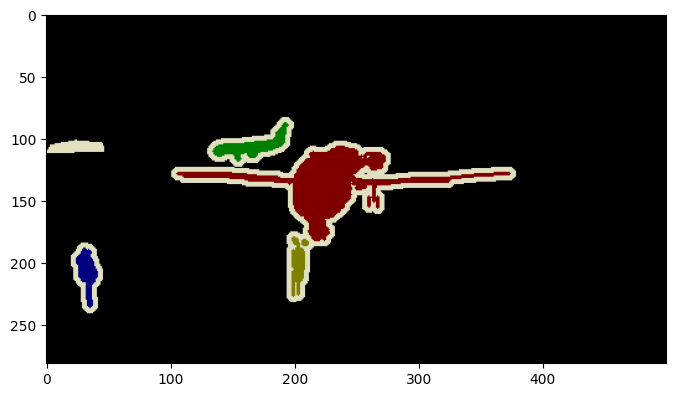

In [6]:

img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/SegmentationObject/2007_000032.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

#### Parsing and Accessing Elements in an Annotation XML File

* Use ElementTree for XML parsing (the `lxml` package is already installed in Colab; `pip install lxml`)


In [7]:
import os
import random

VOC_ROOT_DIR ="/content/data/VOCdevkit/VOC2012/"
ANNO_DIR = os.path.join(VOC_ROOT_DIR, "Annotations")
IMAGE_DIR = os.path.join(VOC_ROOT_DIR, "JPEGImages")

xml_files = os.listdir(ANNO_DIR)
print(xml_files[:5]); print(len(xml_files))

['2008_001478.xml', '2008_002071.xml', '2011_004163.xml', '2011_001360.xml', '2010_000810.xml']
17125


In [ ]:
# !pip install lxml
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

# Parse the XML file and create an Element
tree = ET.parse(xml_file)
root = tree.getroot()

# Image-related information exists as children of the root
image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)
image_size = root.find('size')
image_width = int(image_size.find('width').text)
image_height = int(image_size.find('height').text)

# Find all object elements in the file
objects_list = []
for obj in root.findall('object'):
    # Find the bndbox element among the children of the object element
    xmlbox = obj.find('bndbox')
    # From the bndbox element, extract the values (text) of xmin, ymin, xmax, ymax
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)

    bndbox_pos = (x1, y1, x2, y2)
    class_name = obj.find('name').text
    object_dict = {'class_name': class_name, 'bndbox_pos': bndbox_pos}
    objects_list.append(object_dict)

print('full_image_name:', full_image_name, '\n', 'image_size:', (image_width, image_height))

for object in objects_list:
    print(object)


#### Visualizing Bounding Boxes Using the Object Bounding Box Information from the Annotation


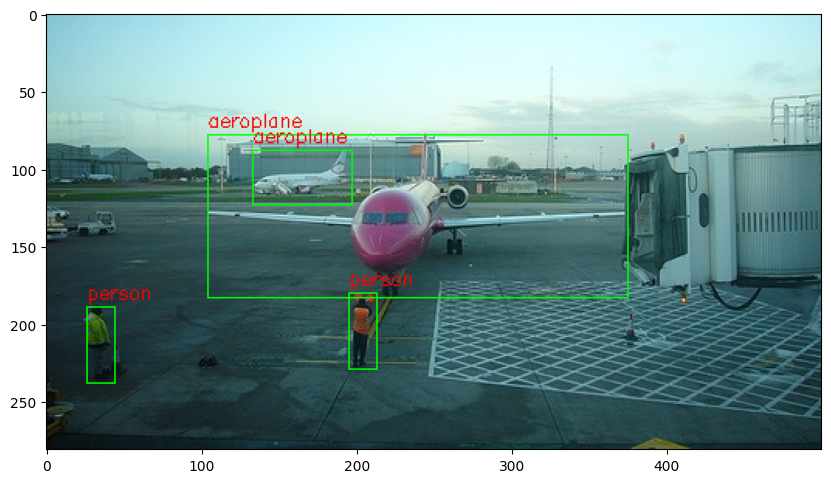

In [8]:
import cv2
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)

img = cv2.imread(full_image_name)
# OpenCV's rectangle() draws directly on the image array provided as an argument,
# so drawing operations are performed on a separate copy of the image array.
draw_img = img.copy()
# OpenCV uses BGR instead of RGB, so red is (0, 0, 255)
green_color = (0, 255, 0)
red_color = (0, 0, 255)

# Find all object elements in the file
objects_list = []
for obj in root.findall('object'):
    xmlbox = obj.find('bndbox')

    left = int(xmlbox.find('xmin').text)
    top = int(xmlbox.find('ymin').text)
    right = int(xmlbox.find('xmax').text)
    bottom = int(xmlbox.find('ymax').text)

    class_name = obj.find('name').text

    # Draw a green bounding box on draw_img at the top-left and bottom-right coordinates
    cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_color, thickness=1)
    # Draw the class name in red at the top-left coordinate of draw_img
    cv2.putText(draw_img, class_name, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
